In [1]:
import heapq
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from utils import get_image, plot_images

In [2]:
image_cache = dict()

In [3]:
def find_similar_images__metric(embedding, index2id, id2index, query_id=None, metrics=('cosine',), topk=5):
    assert len(metrics) > 0
    
    from sklearn.metrics import pairwise_distances
    
    n = embedding.shape[0]
    if query_id is None:
        query_i = np.random.randint(n)
        query_id = index2id[query_i]
    else:
        query_i = id2index[query_id]
        
    # --- show query image    
    plt.title('query_id = %d' % query_id)
    plt.imshow(get_image(image_cache, query_id))
    plt.show()

    # --- show retrieved images for each metric
    for metric in metrics:
        print('-------- retrieved with metric = %s -----' % metric)
        distances = pairwise_distances(embedding[query_i].reshape(1,-1), embedding, metric=metric)
        heap = []
        for i in range(n):            
            if len(heap) < topk:
                heapq.heappush(heap, (-distances[0][i], i))
            else:
                heapq.heappushpop(heap, (-distances[0][i], i))
        heap.sort(reverse=True)
        top_ids = [index2id[i] for _, i in heap]
        plot_images(plt, image_cache, top_ids)

In [5]:
def find_similar_images__dotproduct(query_embedding, target_embedding, index2id, id2index, query_id=None, topk=5):
    
    import numpy as np
    
    n = query_embedding.shape[0]
    if query_id is None:
        query_i = np.random.randint(n)
        query_id = index2id[query_i]
    else:
        query_i = id2index[query_id]
        
    # --- show query image    
    plt.title('query_id = %d' % query_id)
    plt.imshow(get_image(image_cache, query_id))
    plt.show()

    # --- show retrieved images for each metric
    print('-------- retrieved with dotproduct -----')
    scores = np.dot(target_embedding, query_embedding[query_i])
    heap = []
    for i in range(n):
        t = (scores[i], i)
        if len(heap) < topk: heapq.heappush(heap, t)
        else: heapq.heappushpop(heap, t)
    heap.sort(reverse=True)
    top_ids = [index2id[i] for _, i in heap]
    plot_images(plt, image_cache, top_ids)

# Inception Resnet V2

In [ ]:
dirpath = '/mnt/workspace/Ugallery/InceptionResnetV2/'
incresv2_avgpool = np.load(dirpath + 'avg_pool.npy')
incresv2_predict = np.load(dirpath + 'predictions.npy')
with open(dirpath + 'ids') as f:
    incresv2_ids = list(map(int, f.readlines()))
    incresv2_id2index = {_id:i for i,_id in enumerate(incresv2_ids)}

In [ ]:
incresv2_avgpool.shape, incresv2_predict.shape, len(incresv2_ids)

In [ ]:
find_similar_images(incresv2_avgpool, incresv2_ids, incresv2_id2index,
                    metrics=('cosine', 'euclidean'), query_id=38416, topk=10)

# NASNetLarge

In [ ]:
dirpath = '/mnt/workspace/Ugallery/NASNetLarge/'
nasnetlarge_avgpool = np.load(dirpath + 'avg_pool.npy')
nasnetlarge_predict = np.load(dirpath + 'predictions.npy')
with open(dirpath + 'ids') as f:
    nasnetlarge_ids = list(map(int, f.readlines()))
    nasnetlarge_id2index = {_id:i for i,_id in enumerate(nasnetlarge_ids)}

In [ ]:
nasnetlarge_avgpool.shape, nasnetlarge_predict.shape, len(nasnetlarge_ids)

In [ ]:
find_similar_images(nasnetlarge_avgpool, nasnetlarge_ids, nasnetlarge_id2index,
                    metrics=('cosine', 'euclidean'), query_id=38416, topk=10)

# ResNet50

In [8]:
dirpath = '/mnt/workspace/Ugallery/ResNet50/'
resnet50_flatten = np.load(dirpath + 'flatten_1.npy')
with open(dirpath + 'ids') as f:
    resnet50_ids = list(map(int, f.readlines()))
    resnet50_id2index = {_id:i for i,_id in enumerate(resnet50_ids)}

In [9]:
resnet50_flatten.shape, resnet50_fc1000.shape, len(resnet50_ids)

((13297, 2048), (13297, 1000), 13297)

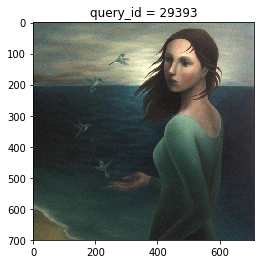

-------- retrieved with metric = cosine -----


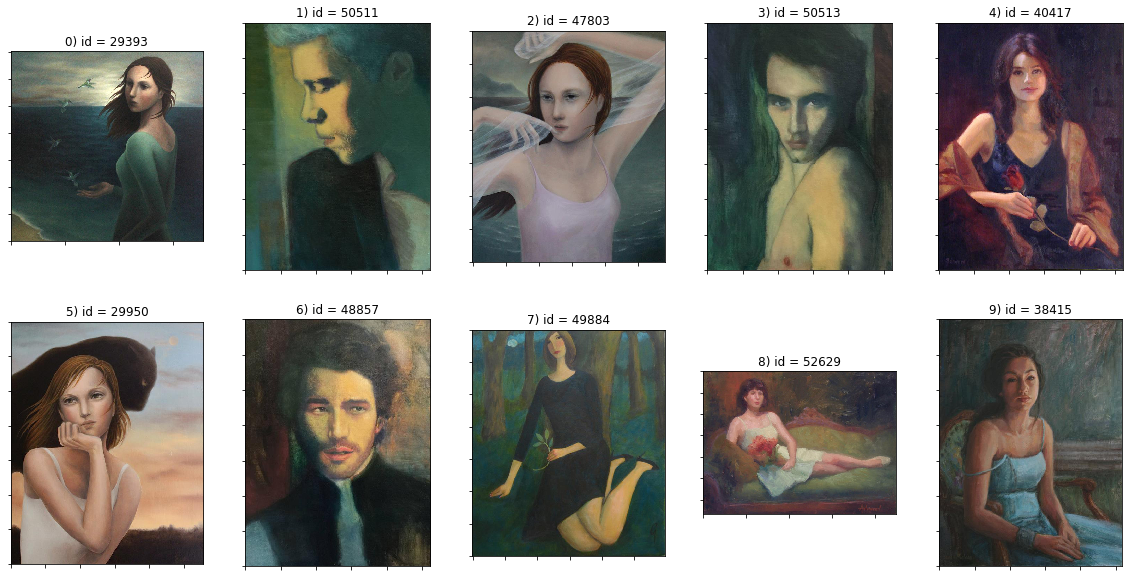

-------- retrieved with metric = euclidean -----


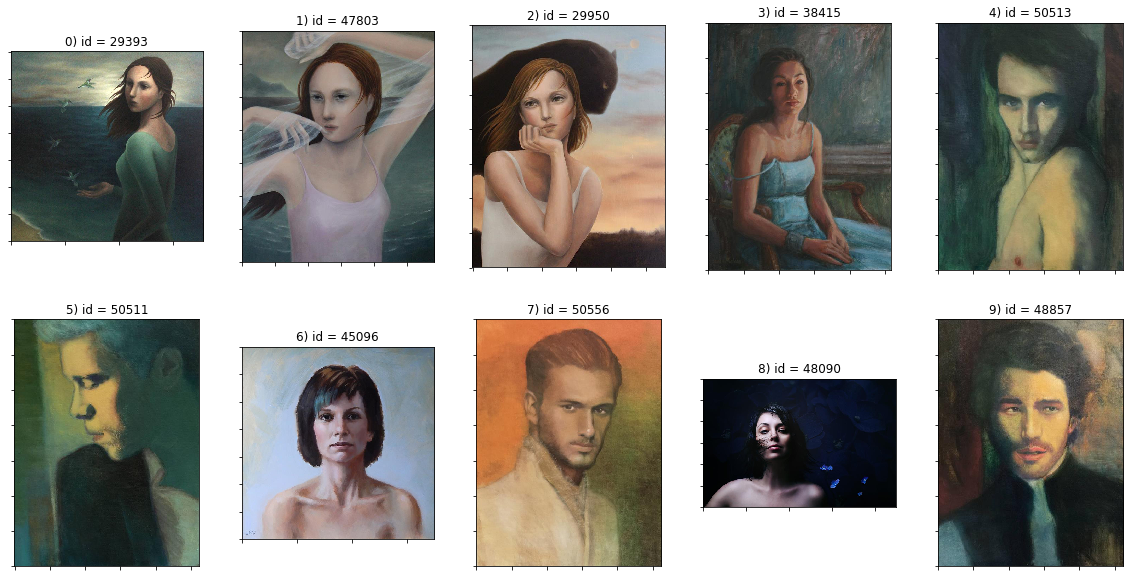

In [6]:
find_similar_images__metric(resnet50_flatten, resnet50_ids, resnet50_id2index,
                    metrics=('cosine', 'euclidean'), query_id=29393, topk=10)

# Content-based Learning to Rank (inspired by Youtube RecSys)

In [4]:
dirpath = '/mnt/workspace/Ugallery/Youtube-like/v7_avgpool+maxpool/'
youtube_item_vectors = np.load(dirpath + 'item_vectors.npy')
# youtube_single_item_profile_vectors = np.load(dirpath + 'single_item_profile_vectors.npy')
with open(dirpath + 'ids') as f:
    youtube_ids = list(map(int, f.readlines()))
    youtube_id2index = {_id:i for i,_id in enumerate(youtube_ids)}

In [5]:
# youtube_item_vectors.shape, youtube_single_item_profile_vectors.shape, len(youtube_ids)
youtube_item_vectors.shape, len(youtube_ids)

((13297, 128), 13297)

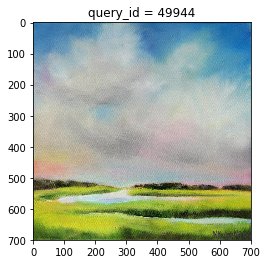

-------- retrieved with metric = cityblock -----


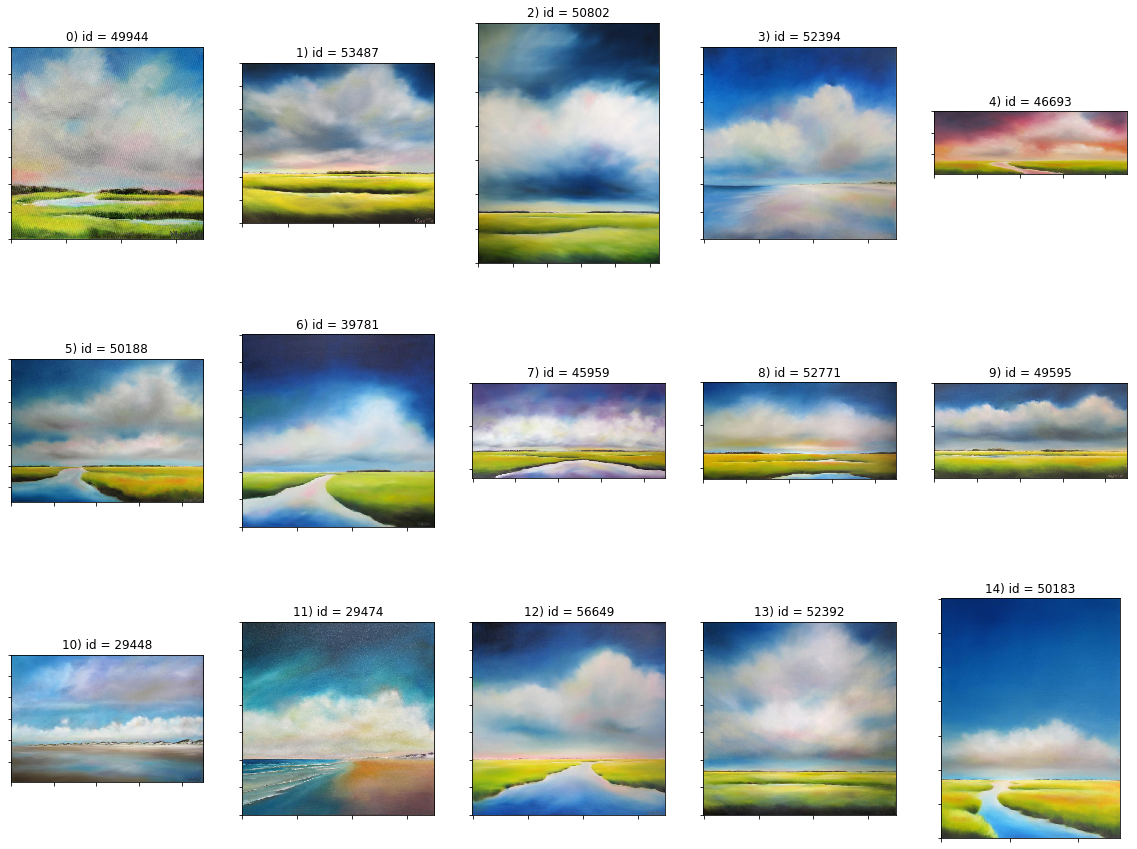

In [28]:
# find_similar_images__dotproduct(youtube_single_item_profile_vectors, youtube_item_vectors,
#                                 youtube_ids, youtube_id2index,
#                                 query_id=45020, topk=15)
find_similar_images__metric(youtube_item_vectors, youtube_ids, youtube_id2index,
                                query_id=None, metrics=('cityblock',), topk=15)

# VBPR item vectors

In [ ]:
dirpath = '/mnt/workspace/Ugallery/VBPR/v3_hidinglast/'
vbpr_embeddings = np.load(dirpath + 'item_vectors.npy')
with open(dirpath + 'items_ids') as f:
    vbpr_ids = list(map(int, f.readlines()))
    vbpr_id2index = {_id:i for i,_id in enumerate(vbpr_ids)}

In [ ]:
vbpr_embeddings.shape, len(vbpr_ids)

In [ ]:
find_similar_images(vbpr_embeddings, vbpr_ids, vbpr_id2index,
                    metrics=('euclidean', 'cosine'), query_id=None, topk=10)